In [58]:
from IPython.lib.deepreload import reload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## A brief introduction to Algorithmic Music Composition (in Python!)

In [59]:
# placeholder, for JM to fill in with code that reloads git library once samples 
# have been added

In [70]:
import numpy as np # NumPy allows us to do math with arrays.  
import cosmos # a custom library for working with audio
from IPython.display import Image, display
path = './'
# path = 'cosmos/'


In [32]:
# load some audio samples
snare = cosmos.load_audio(path + "init_samples/snare.wav")
hihat = cosmos.load_audio(path + "init_samples/hihat.wav")
kick = cosmos.load_audio(path + "init_samples/kick.wav")
bongo = cosmos.load_audio(path + "init_samples/bongo.wav")
bongo_left = cosmos.load_audio(path + "init_samples/bongo_left.wav")
bongo_right = cosmos.load_audio(path + "init_samples/bongo_right.wav")
agogo_low = cosmos.load_audio(path + "init_samples/agogo_low.wav")
agogo_high = cosmos.load_audio(path + "init_samples/agogo_high.wav")
finger_cymbal = cosmos.load_audio(path + "init_samples/finger_cymbal.wav")
muted_thud = cosmos.load_audio(path + "init_samples/muted_thud.wav")
conga = cosmos.load_audio(path + "init_samples/conga.wav")
# and listen to it
cosmos.play_audio(snare)


Max amplitude was 1.000030517578125, normalizing.
Max amplitude was 1.000030517578125, normalizing.
Max amplitude was 1.000030517578125, normalizing.


In [33]:
# create an empty audio track
track = cosmos.AudioTrack(duration=5)
# add the snare sample to it
track.add_audio(snare, time=0.0) # at time 0 (in seconds)
track.add_audio(snare, time=1.0) # and at time 1
cosmos.play_audio(track)

In [34]:
# clear the audio track
track.clear()
cosmos.play_audio(track)

In [35]:
track.clear()
# add the snare sample at specified times
times = [0, 0.25, 0.75, 1.25, 1.5, 1.625, 2, 2.125]
# use a for loop to add the snare sample at each time
for time in times:
    track.add_audio(snare, time=time)

cosmos.play_audio(track)

In [36]:
track.clear()
# set the gain of the snare sample (ranging from 0 to 1)
# so that it gets quieter over time
track.add_audio(snare, time=0.0, gain=1.0)
track.add_audio(snare, time=0.25, gain=0.5)
track.add_audio(snare, time=0.5, gain=0.25)
track.add_audio(snare, time=0.75, gain=0.125)
track.add_audio(snare, time=1.0, gain=0.0625)
track.add_audio(snare, time=1.25, gain=0.03125)
track.add_audio(snare, time=1.5, gain=0.015625)
track.add_audio(snare, time=1.625, gain=0.0078125)
cosmos.play_audio(track)

In [37]:
# Same thing, but with more efficient code
track.clear()
# set the array of times using a list comprehension
# this is equivalent to building the array using a for loop:
''' 
times = []
 for i in range(8):
    times.append(i/4)
'''
times = [i/4 for i in range(8)] # [0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75]

# set the array of gains using a list comprehension
# this is equivalent to building the array using a for loop:
'''
gains = []
for i in range(8):
    gains.append(2 ** -i)
'''
gains = [2 ** -i for i in range(8)] # [1.0, 0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125]

for i in range(len(times)):
    track.add_audio(snare, time=times[i], gain=gains[i])
cosmos.play_audio(track)

In [38]:
track.clear()
# faster, longer, slower decay
number_of_events = 32
times = [i/14 for i in range(number_of_events)]
gains = [2 ** (-0.25 * i) for i in range(number_of_events)]

print([round(i, 2) for i in gains])
for i in range(len(times)):
    track.add_audio(snare, time=times[i], gain=gains[i])
cosmos.play_audio(track)

[1.0, 0.84, 0.71, 0.59, 0.5, 0.42, 0.35, 0.3, 0.25, 0.21, 0.18, 0.15, 0.12, 0.11, 0.09, 0.07, 0.06, 0.05, 0.04, 0.04, 0.03, 0.03, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0]


# Activity: 
1. Go to https://www.freesound.org, sign up for a free account, and download five samples that are all less than 0.5 seconds long. JM will demonstrate how to search and filter. Rename the samples such that they start with your last name (i.e.  `myers_leaf_crunching`). Then, add these samples to [this google drive folder](https://drive.google.com/drive/folders/1HjZSp4v75cPgeulyDoZykOMZ5pNodSJu?usp=sharing). I will add this folder to the notebook while you are working on the rest of this activity, so you will be able to use these samples in the rest of the notebook.  
2. Go through each of the above cells, to get a handle on how everything is working. As you go, play around with parameter numbers to see what sort of effect they have on the generated audio output. You can always `print(...)` variables or equations out to see what their result is. 
3. Add 10 - 20 "snare" audio samples to a `track` using `track.add_audio(...)` at regularly spaced time intervals in which the "gain" (or volume) starts quiet (around 0.0), rises (to around 1.0), and then falls (back to 0.0) over the course of all of the snare events. 
4. Construct an irregular (non-periodic) rhythm out of 4 - 8 "snare" hits that repeats 2 - 3 times.
5. Experiment with adding other samples to create a series of events with a succession of different samples (i.e. 4 `snare` followed by 7 `kick` followed by 3 `bongo`, etc.) 
6. BONUS: Use a list comprehension (i.e. `[i/5 for i in range(10)]`) to construct a set of time points for snare hits that gradually slows down or speeds up. Hint: first create a `durations` array of time durations that get smaller or bigger, and use that to generate the `times` array. Something along the lines of `durations = [0.5 * 1.1 ** (i) for i in range(num_of_events)]`. To convert `durations` to `times`, you can use a for loop to go through the `durations` list and keep accumulating time with each step. 
```times = []
accumulated_time = 0
for dur in durations:
    times.append(accumulated_time)
    accumulated_time += dur
```

In [39]:
#3
# Add 10 - 20 "snare" audio samples to a `track` using `track.add_audio(...)` at 
# regularly spaced time intervals in which the "gain" (or volume) starts quiet 
# (around 0.0), rises (to around 1.0), and then falls (back to 0.0) over the 
# course of all of the snare events. 
track.clear()

In [40]:
#4
# Construct an irregular rhythm out of 4 - 8 "snare" hits that repeats 2 - 3 times.
track.clear()

In [41]:
#5
# Experiment with adding other samples to create a series of events with a 
# succession of different samples (i.e. 4 `snare` followed by 7 `kick` followed 
# by 3 `bongo`, etc.) 
track.clear()

In [42]:
#6
# BONUS: Use a list comprehension (i.e. `[i/5 for i in range(10)]`) to construct 
# a set of time points for snare hits that gradually slows down or speeds up. 
# Hint: first create a `durations` array of time durations that get smaller or 
# bigger, and use that to generate the `times` array. Something along the lines 
# of `durations = [0.5 * 1.1 ** (i) for i in range(num_of_events)]`. To convert 
# `durations` to `times`, you can use a for loop to go through the `durations` 
# list and keep accumulating time with each step. 

# times = []
# accumulated_time = 0
# for dur in durations:
#     times.append(accumulated_time)
#     accumulated_time += dur
track.clear()

## Patterns

In [43]:
# placeholder, for JM to fill in with code that reloads git library once samples 
# have been added

In [44]:
# Create a pattern of times (using durations) and gains
track = cosmos.AudioTrack(duration=20)
durations = [1/2, 1/4, 1/2, 1/4, 1/8, 3/8]
gains = [0.3, 0.7, 0.3, 1, 0.7, 0.2]
pattern = cosmos.Pattern(durations=durations, gains=gains, samples=snare, cycles=1)
track.add_audio(pattern.to_audio())
cosmos.play_audio(track)


In [45]:
# Make the pattern repeat 4 times
track.clear()
pattern.cycles = 4
track.add_audio(pattern.to_audio())
cosmos.play_audio(track)

In [46]:
# vary the samples
track.clear()

samples_1 = [hihat, hihat, snare, hihat, hihat, snare]
pattern = cosmos.Pattern(durations=durations, gains=gains, samples=samples_1, cycles=4)
track.add_audio(pattern.to_audio(), time=0.0)
cosmos.play_audio(track)

In [47]:
# create a new pattern, and alternate between the two patterns
track.clear()

pattern_1 = cosmos.Pattern(durations=durations, gains=gains, samples=samples_1, cycles=2)
durations_2 = [1/8, 1/8, 1/8, 1/8, 1/8, 1/8, 1/8, 1/8, 3/8, 1/4, 3/8]
samples_2 = [bongo, bongo, bongo, bongo, bongo, snare, snare, snare, snare, hihat, hihat]
gains_2 = [1, 0.9, 0.8, 0.7, 0.6, 0.3, 0.4, 0.5, 0.6, 1, 1]
pattern_2 = cosmos.Pattern(durations=durations_2, gains=gains_2, samples=samples_2, cycles=2)
# add the first pattern
track.add_audio(pattern_1.to_audio(), time=0.0)
next_time = pattern_1.dur_tot
# add the second pattern
track.add_audio(pattern_2.to_audio(), time=next_time)
next_time += pattern_2.dur_tot
# add the first pattern again
track.add_audio(pattern_1.to_audio(), time=next_time)
cosmos.play_audio(track)


Audio would have clipped, had to normalize it first.


In [48]:
track.clear()
# alter the total duration of a pattern

# first add a pattern, with three total repetitions
pattern_2 = cosmos.Pattern(durations=durations_2, gains=gains_2, samples=samples_2, cycles=3)
track.add_audio(pattern_2.to_audio(), time=0.0)
next_time = pattern_2.dur_tot
# then change the total duration of the pattern, making it twice as fast
pattern_2.set_cycle_duration(pattern_2.cycle_dur / 2)
# and extend the number of repetitions
pattern_2.cycles *= 2
# add the pattern again
track.add_audio(pattern_2.to_audio(), time=next_time)

# now make it twice as slow, with a total of 2 repetitions
next_time += pattern_2.dur_tot
pattern_2.set_cycle_duration(pattern_2.cycle_dur * 4)
pattern_2.cycles = 2
# add the pattern again
track.add_audio(pattern_2.to_audio(), time=next_time)
cosmos.play_audio(track)

Audio would have clipped, had to normalize it first.


In [49]:
track.clear()
# multiple patterns at the same time, that phrase over each other
# starts with two repetitions of the first pattern, then the second one joins in

durations_3 = [1/4, 1/2, 1/4, 1/2, 1/4, 5/4] # sums to 3
samples_3 = [bongo, hihat, bongo, hihat, bongo, hihat]
gains_3 = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
pattern_3 = cosmos.Pattern(durations=durations_3, gains=gains_3, samples=samples_3, cycles=10)

durations_4 = [1/2, 1/4, 1/2, 1/2, 1/4, 1/2, 1/2, 1/4, 3/4] # sums to 4
samples_4 = [kick, snare, snare, kick, snare, snare, kick, snare, snare]
gains_4 = [1, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6]
pattern_4 = cosmos.Pattern(durations=durations_4, gains=gains_4, samples=samples_4, cycles=6)

# time after two repetitions of pattern_3
entrance_time = 2 * pattern_3.cycle_dur

# add the first pattern
track.add_audio(pattern_3.to_audio(), time=0.0)
# add the second pattern
track.add_audio(pattern_4.to_audio(), time=entrance_time)
cosmos.play_audio(track)

Audio would have clipped, had to normalize it first.


In [50]:
#create a very subtle phase effect
track.clear()
durations = [1/4, 1/4, 1/4, 1/4, 3/8, 1/4, 3/8]
gains = [1 for i in range(len(durations))]
pattern_5 = cosmos.Pattern(durations=durations, gains=gains, samples=[bongo_left], cycles=40)
track.add_audio(pattern_5.to_audio(), time=0.0)
# alter the cycle duration slightly
pattern_6 = cosmos.Pattern(durations=durations, gains=gains, samples=[bongo_right], cycles=40)
pattern_6.set_cycle_duration(pattern_6.cycle_dur * 1.005)
track.add_audio(pattern_6.to_audio(), time=0.0)
cosmos.play_audio(track)

# Activity

1. Work through the above cells, again, making sure to try to understand how everything is working. Experiment by altering the numbers, choices of sample, etc.
2. Make a pattern using at least four samples, where the volume gets quieter over the course of the pattern. Have it repeat a number of times. Feel free to use your own samples, or samples from your peers!
3. Make three different patterns, and alternate between them in the following form: `A, B, A, C, B, A, C, B, C, B`. Hint: be sure to use a variable `next_time` initialized as `next_time=0` that keeps accumulating time as you add each pattern to an audio track. Use this accumulating time when adding each pattern (i.e. `track.add_audio(pattern.to_audio(), time=next_time)`)
4. Generate two patterns, one very fast and quiet, one very slow and loud, and have them phase over each-other. (By phase, I mean they should each repeat but have a differnet total cycle duration. Could be a very subtle difference, or a clear one, up to you!)
5. Make a pattern repeat 5 times, but each time it repeats, it should be at a different speed.
6. BONUS: Use a random number generator to decide the durations of a pattern. To generate five random numbers between 0.5 and 1.5, you can either use python's built in random generator like this `[random.randrange(0.5, 1.5) for i in range(5)]`, or the `numpy` library like this `np.random.uniform(0.5, 1.5, 5)`.


In [51]:
#2
# Make a pattern using at least four samples, where the volume gets quieter over 
# the course of the pattern. Have it repeat a number of times. Feel free to use 
# your own samples, or samples from your peers!

# To use one of the samples we just added, load it like this:
# my_sample = cosmos.load_audio(path + "init_samples/freesound_samples/myers_my_sample.wav")

track.clear()



In [52]:
#3
# Make three different patterns, and alternate between them in the following 
# form: `A, B, A, C, B, A, C, B, C, B`. Hint: be sure to use a variable 
# `next_time` initialized as `next_time=0` that keeps accumulating time as you 
# add each pattern to an audio track. Use this accumulating time when adding 
# each pattern (i.e. `track.add_audio(pattern.to_audio(), time=next_time)`)
track.clear()

In [53]:
#4
# Generate two patterns, one very fast and quiet, one very slow and loud, and 
# have them phase over each-other. (By phase, I mean they should each repeat but 
# have a differnet total cycle duration. Could be a very subtle difference, or a 
# clear one, up to you!)
track.clear()

In [54]:
#5
# Make a pattern repeat 5 times, but each time it repeats, it should be at a 
# different speed.
track.clear()


# Working with Meter

all_pulses
[ 0.   0.6  1.2  1.8  2.4  3.   3.6  4.2  4.8  5.4  6.   6.6  7.2  7.8
  8.4  9.   9.6 10.2 10.8 11.4 12.  12.6 13.2 13.8 14.4 15.  15.6 16.2
 16.8 17.4 18.  18.6]

 all_subdivisions
[ 0.   0.3  0.6  0.9  1.2  1.5  1.8  2.1  2.4  2.7  3.   3.3  3.6  3.9
  4.2  4.5  4.8  5.1  5.4  5.7  6.   6.3  6.6  6.9  7.2  7.5  7.8  8.1
  8.4  8.7  9.   9.3  9.6  9.9 10.2 10.5 10.8 11.1 11.4 11.7 12.  12.3
 12.6 12.9 13.2 13.5 13.8 14.1 14.4 14.7 15.  15.3 15.6 15.9 16.2 16.5
 16.8 17.1 17.4 17.7 18.  18.3 18.6 18.9]


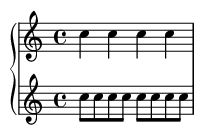

In [72]:
# define a "4/4" meter with 4 beats per measure and each beat subdivided into two parts
# tempo of 60 bpm, for 4 cycles

num_cycles = 8
simple_meter = cosmos.Meter(hierarchy=[4, 2], tempo=100, cycles=num_cycles)
all_subdivisions = simple_meter.all_times()
all_pulses = simple_meter.all_times(top_layer=1)
print('all_pulses')
print(all_pulses)
print('\n', 'all_subdivisions')
print(all_subdivisions)
# for subdivision in all_subdivisions:
    # print(subdivision)
display(Image(path + 'notation/example_1.png'))



In [ ]:
track.clear()
# add hi-hat every subdivision

def set_up_basic_drumset_meter():
    num_cycles = 8
    simple_meter = cosmos.Meter(hierarchy=[4, 2], tempo=100, cycles=num_cycles)
    all_subdivisions = simple_meter.all_times()
    all_pulses = simple_meter.all_times(top_layer=1)    

    for time in all_subdivisions:
        track.add_audio(hihat, time=time)
    # add kick on every other pulse
    kick_times = [all_pulses[i] for i in range(len(all_pulses)) if i % 2 == 0]
    for time in kick_times:
        track.add_audio(kick, time=time)
    snare_times = [all_pulses[i] for i in range(len(all_pulses)) if i % 2 == 1]
    for time in snare_times:
        track.add_audio(snare, time=time)

set_up_basic_drumset_meter()
cosmos.play_audio(track)



Audio would have clipped, had to normalize it first.


In [ ]:
track.clear()
# set up basic drum track
set_up_basic_drumset_meter()

# now add bongo hits one by one
# remember: the first beat is beat 0, the first subdivision is subdivision 0!

#beat 2, subdivision 2 
time = simple_meter.get_time([1, 1])
track.add_audio(bongo, time=time)
# beat 3, subdivision 2
time = simple_meter.get_time([2, 1])
track.add_audio(bongo, time=time)
# beat 4, subdivision 1
time = simple_meter.get_time([3, 0])
track.add_audio(bongo, time=time)
cosmos.play_audio(track)



Audio would have clipped, had to normalize it first.


In [ ]:
track.clear()
# set up basic drum track
set_up_basic_drumset_meter()
# same thing, but adding the bongo hits programmatically

# now add some bongo hits by setting up the pulse / subdivisions in advance
bongo_hits = [[1, 1], [2, 1], [3, 0]]

# for every cycle in the meter, add the bongo hits
for cycle in range(num_cycles):
    for hit in bongo_hits:
        time = simple_meter.get_time(hit, cycle=cycle)
        track.add_audio(bongo, time=time)
cosmos.play_audio(track)

Audio would have clipped, had to normalize it first.


In [ ]:
track.clear()
# set up basic drum track
set_up_basic_drumset_meter()

# make a few bongo variations, and then apply them to different cycles in the meter
bongo_hits_1 = [[1, 1], [2, 1], [3, 0]]
bongo_hits_2 = [[0, 1], [1, 0], [2, 0], [2, 1], [3, 1]]
bongo_hits_3 = [[0, 0], [1, 0], [1, 1], [2, 1], [3, 0], [3, 1]]

for cycle in range(num_cycles):
    if (cycle == 0 or cycle == 1 or cycle == 4):
        bongo_hits = bongo_hits_1
    elif (cycle == 2 or cycle == 5 or cycle == 6 or cycle == 7):
        bongo_hits = bongo_hits_2
    else:
        bongo_hits = bongo_hits_3
    for hit in bongo_hits:
        time = simple_meter.get_time(hit, cycle=cycle)
        track.add_audio(bongo, time=time)
cosmos.play_audio(track)
    

Audio would have clipped, had to normalize it first.


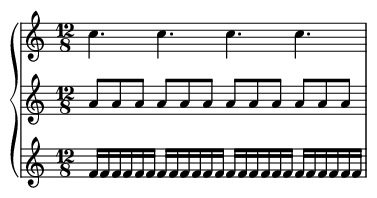

In [73]:
track.clear()
#  set up a 12/8 meter, 4 beats each subdivided into 3 parts
#  tempo of 100 bpm, for 8 cycles

# loosely based on Ghanaian traditional drum piece "Agbekor"

# hierarchy=[4, 3, 2] Indicates that this is a meter with a 4 pulses, each 
# subdivided into 3 subdivisions, and each subdivision is divided into 2 parts

new_meter = cosmos.Meter(hierarchy=[4, 3, 2], tempo=100, cycles=8)

display(Image(path + 'notation/example_2.png'))

In [ ]:
# agogo bell, two variations
bell_var_1 = [[0, 0], [0, 2], [1, 1], [1, 2], [2, 1], [3, 0], [3, 2]]
bell_var_2 = [[0, 2], [1, 1], [1, 2], [2, 1], [3, 0]]
bell_samples_1 = [agogo_high for i in range(len(bell_var_1))]
bell_samples_1[0] = agogo_low
bell_samples_2 = [agogo_high for i in range(len(bell_var_2))]

# finger cymbals
finger_cymbal_pulses = [[1, 0], [2, 0], [3, 0]]

# low thud, three variations
thud_var_1 = [[0, 1], [0, 2], [1, 1], [1, 2], [2, 1], [2, 2], [3, 1], [3, 2]]
thud_var_2 = [
    [0, 1, 0], [0, 1, 1], [1, 0], [1, 1], [1, 2], 
    [2, 1, 0], [2, 1, 1], [3, 0], [3, 1], [3, 2]
]
thud_var_3 = [
    [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 2, 0], [1, 2, 1],
    [2, 1, 0], [2, 1, 1], [3, 0, 0], [3, 0, 1], [3, 2, 0], [3, 2, 1]
]

# bongo, three variations
bongo_var_1 = [
    [0, 2, 0], [0, 2, 1], [1, 0, 0], [1, 0, 1],
    [2, 0, 0], [2, 0, 1], [2, 1, 0], [2, 1, 1],
    [3, 1, 0], [3, 1, 1], [3, 2, 0], [3, 2, 1]
]
bongo_var_2 = [
    [0, 2, 0], [0, 2, 1], [1, 0, 1],
    [2, 0, 0], [2, 0, 1], [2, 1, 1],
    [3, 1, 0], [3, 1, 1], [3, 2, 1]
]
bongo_var_3 = [
    [2, 0, 0], [2, 0, 1], [2, 1, 0], [2, 1, 1],
    [3, 1, 0], [3, 1, 1], [3, 2, 0], [3, 2, 1]
]

# conga, three variations
conga_var_1 = [
    [0, 0], [0, 1], [1, 1], [1, 2], [2, 2], [3, 0]
]
conga_var_2 = [
    [0, 0], [0, 1]
]
conga_var_3 = [[1, 1, 0], [1, 1, 1], [1, 2, 1], 
               [2, 2, 0], [2, 2, 1], [3, 0, 1]]


for cycle in range(num_cycles):
    # agogo bell
    # randomly choose between two variations
    bell_var_idx = np.random.choice([0, 1], p=[0.75, 0.25], size=1)[0]
    bell_samples = [bell_samples_1, bell_samples_2][bell_var_idx]
    bell_var = [bell_var_1, bell_var_2][bell_var_idx]
    for h in range(len(bell_samples)):
        time = new_meter.get_time(bell_var[h], cycle=cycle)
        track.add_audio(bell_samples[h], time=time)

    # finger cymbals 
    for h in range(len(finger_cymbal_pulses)):
        time = new_meter.get_time(finger_cymbal_pulses[h], cycle=cycle)
        track.add_audio(finger_cymbal, time=time)

    # muted_thud
    # randomly choose between three variations
    thud_var_idx = np.random.choice([0, 1, 2], p=[0.5, 0.25, 0.25], size=1)[0]
    thud_var = [thud_var_1, thud_var_2, thud_var_3][thud_var_idx]
    for h in range(len(thud_var)):
        time = new_meter.get_time(thud_var[h], cycle=cycle)
        track.add_audio(muted_thud, time=time)

    # bongo
    # randomly choose between three variations
    bongo_var_idx = np.random.choice([0, 1, 2], size=1)[0]
    bongo_var = [bongo_var_1, bongo_var_2, bongo_var_3][bongo_var_idx]
    for h in range(len(bongo_var)):
        time = new_meter.get_time(bongo_var[h], cycle=cycle)
        track.add_audio(bongo, time=time, gain=0.66)

    # conga
    # randomly choose between three variations
    conga_var_idx = np.random.choice([0, 1, 2], size=1)[0]
    conga_var = [conga_var_1, conga_var_2, conga_var_3][conga_var_idx]
    for h in range(len(conga_var)):
        time = new_meter.get_time(conga_var[h], cycle=cycle)
        track.add_audio(conga, time=time)

cosmos.play_audio(track)

In [ ]:

for cycle in range(num_cycles):
    # agogo bell
    # randomly choose between two variations
    bell_var_idx = np.random.choice([0, 1], p=[0.75, 0.25], size=1)[0]
    bell_samples = [bell_samples_1, bell_samples_2][bell_var_idx]
    bell_var = [bell_var_1, bell_var_2][bell_var_idx]
    for h in range(len(bell_samples)):
        time = new_meter.get_time(bell_var[h], cycle=cycle)
        track.add_audio(bell_samples[h], time=time)

    # finger cymbals 
    for h in range(len(finger_cymbal_pulses)):
        time = new_meter.get_time(finger_cymbal_pulses[h], cycle=cycle)
        track.add_audio(finger_cymbal, time=time)

    # muted_thud
    # randomly choose between three variations
    thud_var_idx = np.random.choice([0, 1, 2], p=[0.5, 0.25, 0.25], size=1)[0]
    thud_var = [thud_var_1, thud_var_2, thud_var_3][thud_var_idx]
    for h in range(len(thud_var)):
        time = new_meter.get_time(thud_var[h], cycle=cycle)
        track.add_audio(muted_thud, time=time)

    # bongo
    # randomly choose between three variations
    bongo_var_idx = np.random.choice([0, 1, 2], size=1)[0]
    bongo_var = [bongo_var_1, bongo_var_2, bongo_var_3][bongo_var_idx]
    for h in range(len(bongo_var)):
        time = new_meter.get_time(bongo_var[h], cycle=cycle)
        track.add_audio(bongo, time=time, gain=0.66)

    # conga
    # randomly choose between three variations
    conga_var_idx = np.random.choice([0, 1, 2], size=1)[0]
    conga_var = [conga_var_1, conga_var_2, conga_var_3][conga_var_idx]
    for h in range(len(conga_var)):
        time = new_meter.get_time(conga_var[h], cycle=cycle)
        track.add_audio(conga, time=time)

cosmos.play_audio(track)

# Activity
1. step through the above cells again, making sure to try to understand how everything is working. Experiment by altering the numbers, choices of sample, etc.
2. Create a 

# Fun with "Chance Operations" (randomization) and Patterns

In [ ]:
# load samples
import os
folder_path = path + "samples"
file_names = [folder_path + '/' + i for i in os.listdir(folder_path)]
samples = [cosmos.load_audio(i) for i in file_names]

Max amplitude was 1.000030517578125, normalizing.
Max amplitude was 1.000030517578125, normalizing.
Max amplitude was 1.000030517578125, normalizing.
Max amplitude was 1.000030517578125, normalizing.
Max amplitude was 1.000030517578125, normalizing.
Max amplitude was 1.000030517578125, normalizing.
Max amplitude was 1.000030517578125, normalizing.
Max amplitude was 1.000030517578125, normalizing.
Max amplitude was 1.000030517578125, normalizing.
Max amplitude was 1.000030517578125, normalizing.


In [ ]:
num_events = 20
cycle_duration = 2.1

pattern = cosmos.Pattern.randomized(num_events, cycle_duration, samples, cycles=5)
track = cosmos.AudioTrack(duration=pattern.dur_tot*2)
track.add_audio(pattern.to_audio(), time=0.0)
# print(pattern.to_audio())
cosmos.play_audio(track)

In [ ]:
number_of_patterns = 15
number_of_sections = 10

cycle_duration_avg = 1.5
std = 2
cycle_durations = cycle_duration_avg * 2 ** np.random.uniform(-std, std, number_of_patterns)
avg_densities = 5 * 2 ** np.random.uniform(-1, 1, number_of_patterns)
pattern_sizes = np.round(avg_densities * cycle_durations).astype(int)

# pattern_sizes = np.random.randint(6, 15, number_of_patterns)
numbers_of_cycles = np.random.randint(1, 5, number_of_sections)
patterns = []
for i in range(number_of_patterns):
    pattern = cosmos.Pattern.randomized(pattern_sizes[i], cycle_durations[i], samples, cycles=1)
    patterns.append(pattern)

total_duration = np.sum([pattern.dur_tot for pattern in patterns])
track = cosmos.AudioTrack(duration=total_duration + 10)
time = 0.0
for i in range(number_of_sections):
    pattern = np.random.choice(patterns)
    pattern.cycles = numbers_of_cycles[i]
    track.add_audio(pattern.to_audio(), time=time)
    time += pattern.dur_tot

cosmos.play_audio(track)

Audio would have clipped, had to normalize it first.
[[-0.00895055 -0.00895055]
 [-0.02747179 -0.02747179]
 [ 0.00033074  0.00033074]
 ...
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]]


Audio would have clipped, had to normalize it first.
